In [2]:
#Basic Lib
import pandas as pd
import numpy as np

#visualization Lib
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation Lib
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#DL Lib
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [3]:
(x_train_digit,y_train_digit),(x_test_digit,y_test_digit)=mnist.load_data()

In [4]:
x_train_digit[59000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 100, 254, 158,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 182, 253, 150,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        123, 247, 253,  68,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

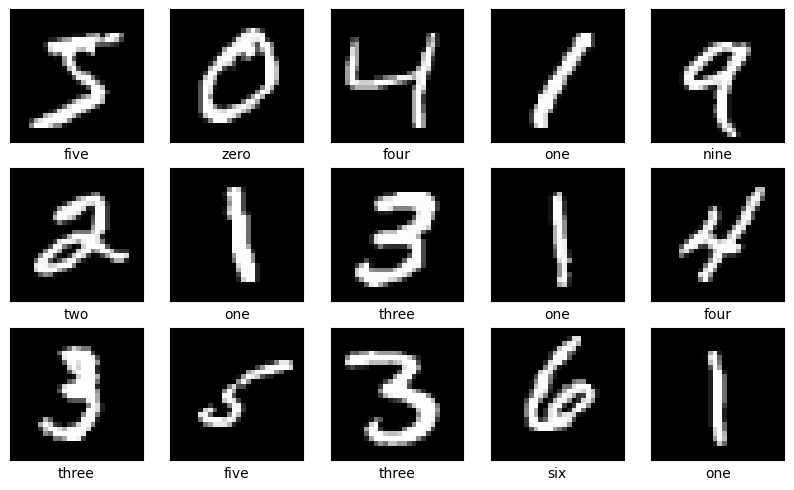

In [6]:
col_names=['zero','one','two','three','four','five','six','seven','eight','nine']

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_digit[i],cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [7]:
x_train_digit.shape,x_test_digit.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
x_train_digit=x_train_digit.reshape(60000,784)
x_test_digit=x_test_digit.reshape(10000,784)

In [9]:
x_train_digit[59000]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 100, 254, 158,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 182, 253, 150,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 123, 247, 253,
        68,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  8

In [10]:
x_train_digit

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [11]:
y_test_digit.shape

(10000,)

In [12]:
y_train_digit=to_categorical(y_train_digit,num_classes=10)
y_test_digit=to_categorical(y_test_digit,num_classes=10)

In [13]:
y_test_digit.shape

(10000, 10)

In [14]:
y_test_digit[1].shape

(10,)

In [15]:
model=keras.Sequential([
    layers.Dense(256,activation='relu',input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(32,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid')])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
history=model.fit(x_train_digit,y_train_digit,batch_size=100,epochs=20,validation_data=(x_test_digit,y_test_digit))

Epoch 1/20
600/600 [==============================] - 4s 4ms/step - loss: 0.9970 - accuracy: 0.6953 - val_loss: 0.2139 - val_accuracy: 0.9422
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.4129 - accuracy: 0.8964 - val_loss: 0.1727 - val_accuracy: 0.9535
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3102 - accuracy: 0.9249 - val_loss: 0.1468 - val_accuracy: 0.9616
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2712 - accuracy: 0.9355 - val_loss: 0.1240 - val_accuracy: 0.9673
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2400 - accuracy: 0.9430 - val_loss: 0.1186 - val_accuracy: 0.9694
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2226 - accuracy: 0.9484 - val_loss: 0.1048 - val_accuracy: 0.9723
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.2108 - accuracy: 0.9503 - val_loss: 0.1058 - val_accuracy: 0.9736
Epoch 

In [19]:
y_pred=model.predict(x_test_digit)

313/313 [==============================] - 1s 1ms/step


In [20]:
y_pred[0]

array([1.92116909e-02, 3.60944301e-01, 6.82159424e-01, 8.27455521e-01,
       4.81303006e-01, 1.19334035e-01, 9.08840331e-04, 9.99983549e-01,
       2.80069560e-02, 9.15499926e-01], dtype=float32)

In [21]:
y_pred=np.argmax(y_pred,axis=1)

In [22]:
y_pred,y_pred.shape

(array([7, 2, 1, ..., 4, 5, 6], dtype=int64), (10000,))

In [23]:
y_test_digit_eval=np.argmax(y_test_digit,axis=1)

In [24]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [25]:
cm=confusion_matrix(y_test_digit_eval,y_pred)

In [26]:
cm

array([[ 972,    0,    0,    0,    0,    1,    3,    1,    3,    0],
       [   0, 1126,    2,    2,    0,    0,    2,    0,    3,    0],
       [   5,    2, 1010,    3,    1,    0,    2,    5,    4,    0],
       [   0,    0,    3,  988,    0,    5,    0,    5,    3,    6],
       [   0,    0,    1,    0,  960,    0,    5,    3,    1,   12],
       [   2,    0,    1,    6,    1,  873,    2,    2,    3,    2],
       [   6,    2,    0,    1,    1,    4,  942,    0,    2,    0],
       [   2,    3,    7,    4,    0,    0,    0, 1006,    0,    6],
       [   4,    1,    3,    7,    4,    2,    4,    3,  943,    3],
       [   2,    2,    1,    0,    7,    4,    0,    5,    4,  984]],
      dtype=int64)

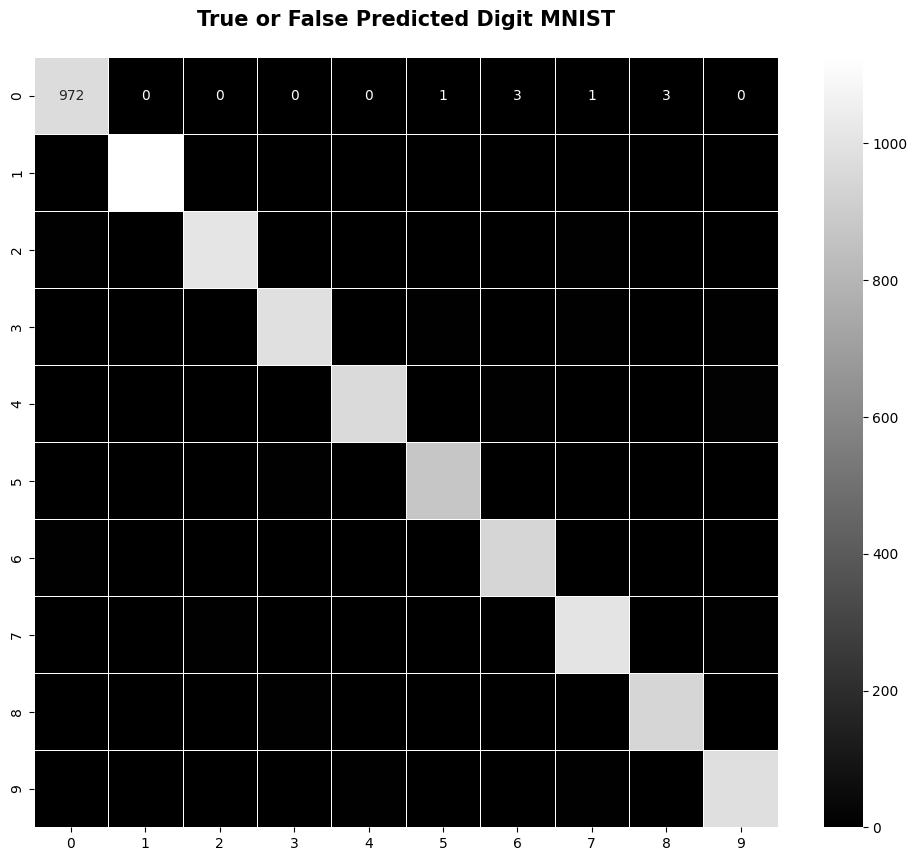

In [28]:
sns.set_palette('deep')
plt.figure(figsize=(12,10))
sns.heatmap(cm,annot=True,annot_kws={'size':10},linewidth=0.5,fmt='d',cmap='gray')
plt.title('True or False Predicted Digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [29]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test_digit_eval,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<function matplotlib.pyplot.show(close=None, block=None)>

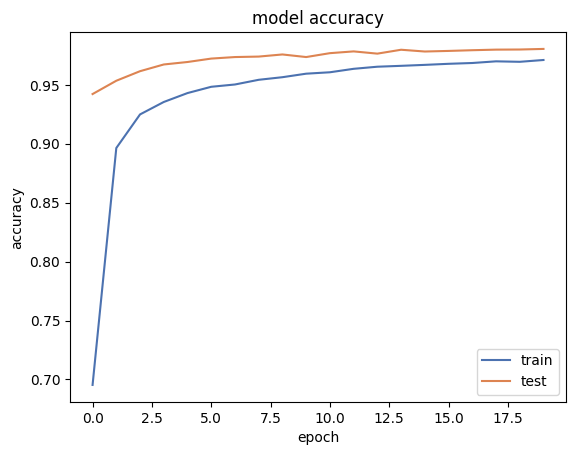

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='best')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

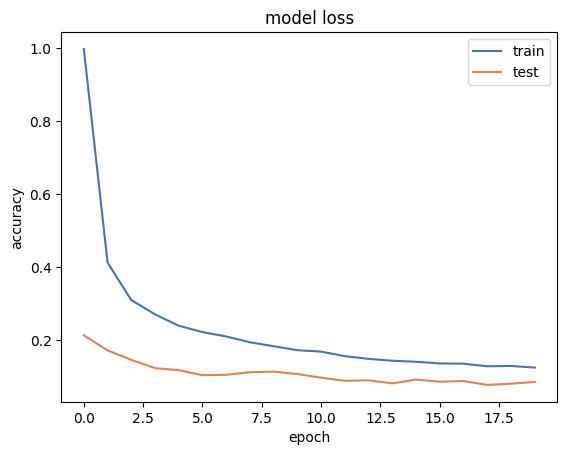

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='best')
plt.show

In [34]:
y_pred_single=model.predict(x_test_digit[[2]])
y_pred_single=np.argmax(y_pred_single,axis=1)
y_test_digit_eval=np.argmax(y_test_digit,axis=1)

1/1 [==============================] - 0s 23ms/step


In [35]:
col_names

['zero',
 'one',
 'two',
 'three',
 'four',
 'five',
 'six',
 'seven',
 'eight',
 'nine']

In [41]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

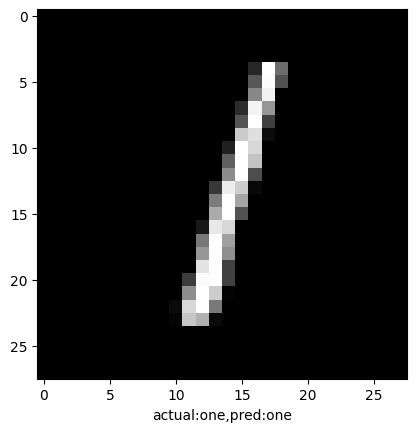

In [43]:
plt.imshow(x_test_digit[2].reshape(28,28),cmap='gray')
plt.xlabel("actual:{},pred:{}".format(col_names[y_test_digit_eval[2]],col_names[y_pred_single[0]]))
plt.show()
                                     